# L6 ფაილის გახსნა და მონაცემთა წმენდა

In [169]:
import pandas as pd

df = pd.read_csv('Earthquakes_database.csv')

# ახალი სვეტების დამატება უკვე არსებულების გამოყენებით
df[['Day', 'Month', 'Year']] = df['Date'].str.split('/', expand=True)
df[['Hour', 'Minute', 'Second']] = df['Time'].str.split(':', expand=True)

# იმ სვეტების დადროპვა რომლეთა ნახავერზე მეტი მონაცემები არის ცარიელი
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)


df


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Day,Month,Year,Hour,Minute,Second
0,1/2/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,2,1965,13,44,18
1,1/4/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,4,1965,11,29,49
2,1/5/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,5,1965,18,05,58
3,1/8/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,8,1965,18,49,43
4,1/9/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,9,1965,13,32,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,8:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.1898,NN00570710,NN,NN,NN,Reviewed,12,28,2016,8,22,12
23408,12/28/2016,9:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.2187,NN00570744,NN,NN,NN,Reviewed,12,28,2016,9,13,47
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.5200,US10007NAF,US,US,US,Reviewed,12,28,2016,12,38,51
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.4300,US10007NL0,US,US,US,Reviewed,12,29,2016,22,30,19


# L7 ქათის გამოყენება და კატეგორიებად დაყოფა

In [170]:
# ლეიბლების განსაზღვრა
bins = [0, 4, 5, 6, 7, 8, 10]
labels = ['Minor', 'Light', 'Moderate', 'Strong', 'Major', 'Great']

df['Magnitude Category'] = pd.cut(df['Magnitude'], bins=bins, labels=labels)

df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,...,Location Source,Magnitude Source,Status,Day,Month,Year,Hour,Minute,Second,Magnitude Category
0,1/2/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,ISCGEM860706,...,ISCGEM,ISCGEM,Automatic,1,2,1965,13,44,18,Moderate
1,1/4/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,ISCGEM860737,...,ISCGEM,ISCGEM,Automatic,1,4,1965,11,29,49,Moderate
2,1/5/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,ISCGEM860762,...,ISCGEM,ISCGEM,Automatic,1,5,1965,18,05,58,Strong
3,1/8/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,ISCGEM860856,...,ISCGEM,ISCGEM,Automatic,1,8,1965,18,49,43,Moderate
4,1/9/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,ISCGEM860890,...,ISCGEM,ISCGEM,Automatic,1,9,1965,13,32,50,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,8:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.1898,NN00570710,...,NN,NN,Reviewed,12,28,2016,8,22,12,Moderate
23408,12/28/2016,9:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.2187,NN00570744,...,NN,NN,Reviewed,12,28,2016,9,13,47,Moderate
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.5200,US10007NAF,...,US,US,Reviewed,12,28,2016,12,38,51,Moderate
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.4300,US10007NL0,...,US,US,Reviewed,12,29,2016,22,30,19,Strong


# L9 მონაცემთა reshaping

In [171]:

pivot_df = df.pivot_table(values='Magnitude', index='Year', columns='Magnitude Category', aggfunc='count', observed=False)

pivot_df


Magnitude Category,Minor,Light,Moderate,Strong,Major,Great
Year,,,,,,
1965,0,0,230,94,13,2
1966,0,0,150,77,6,1
1967,0,0,164,86,5,0
1968,0,0,173,114,17,1
1969,0,0,205,108,10,0
1970,0,0,224,108,13,0
1971,0,0,267,108,10,1
1972,0,0,279,96,13,0
1973,0,0,332,62,7,0


In [172]:

# Stack-ის მაგალითი
stacked_df = df.stack()

stacked_df

0      Date                    1/2/1965
       Time                    13:44:18
       Latitude                  19.246
       Longitude                145.616
       Type                  Earthquake
                                ...    
23411  Year                        2016
       Hour                          20
       Minute                        08
       Second                        28
       Magnitude Category      Moderate
Length: 485583, dtype: object

# L10 დიაგრამები

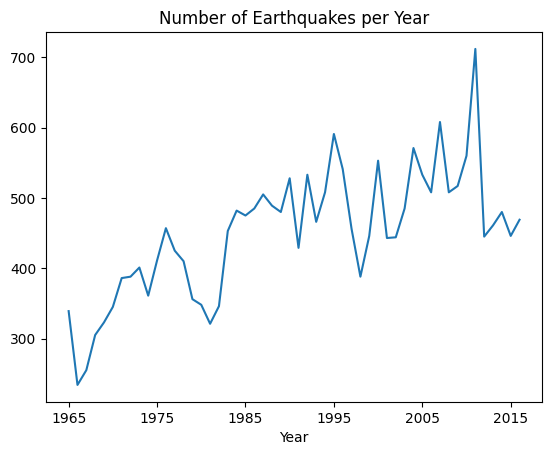

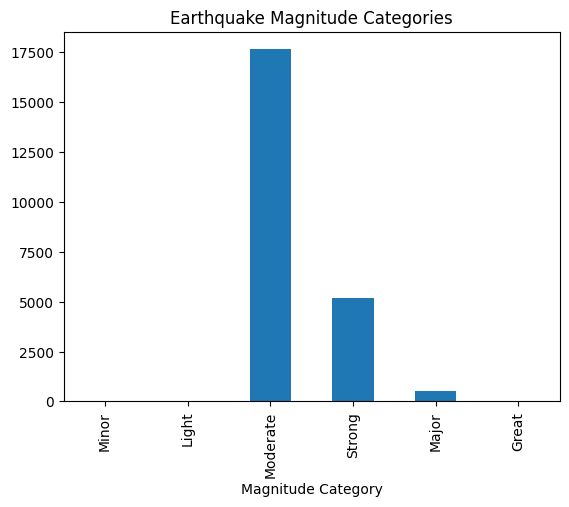

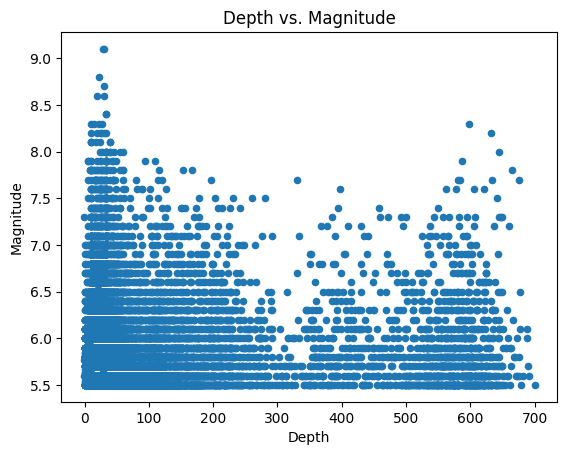

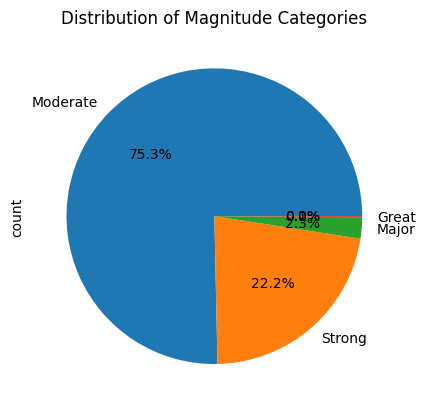

In [153]:
import matplotlib.pyplot as plt

# ხაზოვანი დიაგრამა
df.groupby('Year').size().plot(kind='line')
plt.title('Number of Earthquakes per Year')
plt.show()

# Bar chart
df.groupby('Magnitude Category', observed=False).size().plot(kind='bar')
plt.title('Earthquake Magnitude Categories')
plt.show()

# Scatter chart
df.plot(kind='scatter', x='Depth', y='Magnitude')
plt.title('Depth vs. Magnitude')
plt.show()

# Pie chart
df['Magnitude Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Magnitude Categories')
plt.show()


# L11  თარიღების ტრანსფორმაცია

In [167]:
# უცნაური/არასწორი თარიღების დაჰენდლვა
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format="%m/%d/%Y")
    except ValueError:
        # If the format doesn't match, return NaN or handle it accordingly
        return pd.NaT

df['Date'] = df['Date'].apply(parse_date)

# დადროპვა არასწოროი ან ცარიელი თარიღების
df.dropna(subset=['Date'], inplace=True)

# მიწისძვრების დთვლა წლიურად
earthquakes_per_year = df.resample('YE', on='Date').size()

# სეზონების ამოღება
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Month'] = df['Date'].dt.month

df['Season'] = df['Month'].apply(get_season)

print(earthquakes_per_year)



Date
1965-12-31    339
1966-12-31    234
1967-12-31    255
1968-12-31    305
1969-12-31    323
1970-12-31    345
1971-12-31    386
1972-12-31    388
1973-12-31    401
1974-12-31    361
1975-12-31    411
1976-12-31    457
1977-12-31    425
1978-12-31    410
1979-12-31    356
1980-12-31    348
1981-12-31    321
1982-12-31    346
1983-12-31    453
1984-12-31    482
1985-12-31    475
1986-12-31    485
1987-12-31    505
1988-12-31    489
1989-12-31    480
1990-12-31    528
1991-12-31    429
1992-12-31    533
1993-12-31    466
1994-12-31    508
1995-12-31    591
1996-12-31    541
1997-12-31    456
1998-12-31    388
1999-12-31    446
2000-12-31    553
2001-12-31    443
2002-12-31    444
2003-12-31    485
2004-12-31    571
2005-12-31    533
2006-12-31    508
2007-12-31    608
2008-12-31    508
2009-12-31    517
2010-12-31    560
2011-12-31    712
2012-12-31    445
2013-12-31    461
2014-12-31    480
2015-12-31    446
2016-12-31    469
Freq: YE-DEC, dtype: int64


In [168]:
df[['Date', 'Season']]

,Date,Season
0,1965-01-02,Winter
1,1965-01-04,Winter
2,1965-01-05,Winter
3,1965-01-08,Winter
4,1965-01-09,Winter
...,...,...
23407,2016-12-28,Winter
23408,2016-12-28,Winter
23409,2016-12-28,Winter
23410,2016-12-29,Winter
